<a href="https://colab.research.google.com/github/Imran0897/Placement-Assignment_Md_Imran/blob/main/ML_08_Placement_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Placement_Task/ML_08/train.csv')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(inplace=True)

<Axes: xlabel='is_duplicate', ylabel='count'>

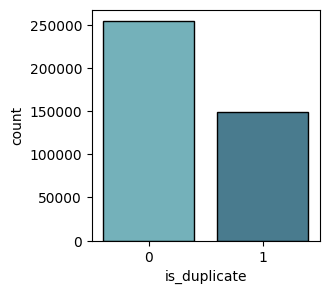

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(131)
sns.countplot(x= 'is_duplicate', data = df, palette="GnBu_d",edgecolor="black")

In [ ]:
def clean_text_p(text):
    # Remove special characters and hashtags
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = re.sub(r'#\w+', '', cleaned_text)
    
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    review = cleaned_text.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review.strip()

In [ ]:
df['question1'] = df['question1'].apply(clean_text_p)

In [ ]:
df['question2'] = df['question2'].apply(clean_text_p)

In [ ]:
df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0
1,1,1,3,4,stori kohinoor kohinoor diamond,would happen indian govern stole kohinoor kohi...,0
2,2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0
3,3,3,7,8,mental lone solv,find remaind math2324math divid 2423,0
4,4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0


In [ ]:
# Split the dataset into training and testing sets
X = df[['question1', 'question2']]
y = df['is_duplicate']

In [ ]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create a TF-IDF vectorizer
vectorizer1 = TfidfVectorizer(max_features=50,ngram_range=(1,3))

vectorizer2 = TfidfVectorizer(max_features=50,ngram_range=(1,3))

In [ ]:
X_1=vectorizer1.fit_transform(X['question1']).toarray()

In [ ]:
X_2=vectorizer2.fit_transform(X['question2']).toarray()

In [ ]:
uniq_feature=[]

In [ ]:
for i in vectorizer2.get_feature_names_out():
  uniq_feature.append("2"+i)

In [ ]:
X_new=pd.concat([pd.DataFrame(X_1,columns=vectorizer1.get_feature_names_out()),pd.DataFrame(X_2,columns=uniq_feature)],axis=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
for i in range(10):
  similarity = cosine_similarity(X_1,X_2)
  print(similarity)

In [ ]:
cosine_similarity(pd.DataFrame(X_1,columns=vectorizer1.get_feature_names_out())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
# Train a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict similarity on the testing set
y_pred_lgt = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lgt)
print("Accuracy:", accuracy)
print('Classification Report of Random Forest Classifier : \n',classification_report(y_test,y_pred_lgt, digits=4))

Accuracy: 0.6578322491281011
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.6646    0.9241    0.7732     51026
           1     0.6092    0.2025    0.3039     29832

    accuracy                         0.6578     80858
   macro avg     0.6369    0.5633    0.5385     80858
weighted avg     0.6442    0.6578    0.6000     80858



In [ ]:
# Train a logistic regression classifier
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

# Predict similarity on the testing set
y_pred_xgb = classifier_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)
print('Classification Report of Random Forest Classifier : \n',classification_report(y_test,y_pred_xgb, digits=4))

Accuracy: 0.6851517475079769
Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

           0     0.6902    0.9091    0.7847     51026
           1     0.6602    0.3021    0.4145     29832

    accuracy                         0.6852     80858
   macro avg     0.6752    0.6056    0.5996     80858
weighted avg     0.6791    0.6852    0.6481     80858

